In [1]:
import tweepy
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
from wordcloud import STOPWORDS
import pandas as pd
import sys

In [2]:
#credenciais da API do twitter
consumerKey = 'sYt53JHVZ5aKYrnKoy3hmL3ad'
consumerSecret = 'qMoCg6G7VneJjqNzkX3NMxblJD2aGZG3ylJnKINk0m2VvrXEgp'
accessToken = '1240872613876031488-StPoIim7kXuda00we1tDlv8damYEzU'
accessTokenSecret = 'axYYObMYwwkxbVj151we4GMgbcs0pk0jE3iOiHgGHBb9n'

In [3]:
#criação de um objeto de autentificação
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

#definindo o acesso ao token e ao token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

#Criando a objeto API para passar as informações de autenticação
api = tweepy.API(authenticate, wait_on_rate_limit= True)

In [4]:
df_treino = pd.read_csv('./data/df_segundo_turno_final_sem_stopwords')

In [5]:
df_treino

,Unnamed: 0,palavra_chave,tweet,classificacao
0,0,Marília Arraes,"pt apoia frentes varios estados segundo turno,...",Positivo
1,1,Marília Arraes,"pt apoia frentes varios estados segundo turno,...",Positivo
2,2,Marília Arraes,vamos marilia arraes juntos voce voce ! muita ...,Positivo
3,3,Marília Arraes,"audio, deputado diz marilia arraes sugeriu fiz...",Positivo
4,4,Marília Arraes,companheiros companheiras pcdob ficarao quieto...,Negativo
...,...,...,...,...
995,995,João Campos,interessante joao campos psb investindo pesado...,Negativo
996,996,João Campos,tse nao vai fazer nada contra crivella joao ca...,Negativo
997,997,João Campos,tse nao vai fazer nada contra crivella joao ca...,Negativo
998,998,João Campos,curta carreira joao campos. comecou ideias cla...,Positivo


In [39]:
especifico = df_treino.loc[df_treino ['palavra_chave'] == 'João Campos', :]

In [44]:
especifico = especifico.reset_index(drop=True)

In [45]:
especifico


,Unnamed: 0,palavra_chave,tweet,classificacao
0,500,João Campos,curta carreira joao campos. comecou ideias cla...,Positivo
1,501,João Campos,realmente acho cambada maluco influenciando jo...,Negativo
2,502,João Campos,tse nao vai fazer nada contra crivella joao ca...,Negativo
3,503,João Campos,"pai, nao poderia ser diferente pois alem tudo ...",Positivo
4,504,João Campos,joao campos cara movimento renova br luciano h...,Negativo
...,...,...,...,...
495,995,João Campos,interessante joao campos psb investindo pesado...,Negativo
496,996,João Campos,tse nao vai fazer nada contra crivella joao ca...,Negativo
497,997,João Campos,tse nao vai fazer nada contra crivella joao ca...,Negativo
498,998,João Campos,curta carreira joao campos. comecou ideias cla...,Positivo


In [46]:
Positivos = [] ; Negativos = []; Neutro = []

for i in range(0, especifico.shape[0] ):
    if(especifico['classificacao'][i] == 'Positivo'):
        Positivos.append(especifico['tweet'][i])
    elif(especifico['classificacao'][i] == 'Negativo'):
        Negativos.append(especifico['tweet'][i])
    else:
        Neutro.append(especifico['tweet'][i])

In [50]:
allPositivo = ' '.join(map(str, Positivos))
stop_words = ["ou", "e", "+", "https"] + list(STOPWORDS)
wordCloud1 = WordCloud(width = 500, background_color='white', stopwords = stop_words, height = 300, random_state = 21, max_font_size = 199).generate(allPositivo)

allNegativo = ' '.join(map(str, Negativos))
stop_words = ["ou", "e", "+", "https"] + list(STOPWORDS)
wordCloud2 = WordCloud(width = 500, background_color='white', stopwords = stop_words, height = 300, random_state = 21, max_font_size = 199).generate(allNegativo)

allNeutro = ' '.join(map(str, Neutro))
stop_words = ["ou", "e", "+", "https"] + list(STOPWORDS)
wordCloud3 = WordCloud(width = 500, background_color='white', stopwords = stop_words, height = 300, random_state = 21, max_font_size = 199).generate(allNeutro)

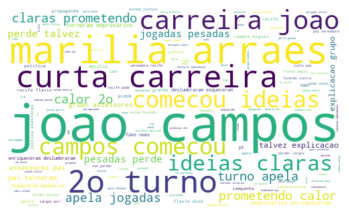

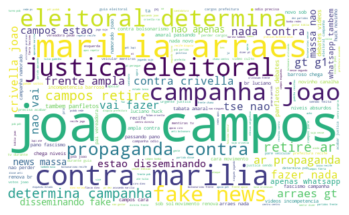

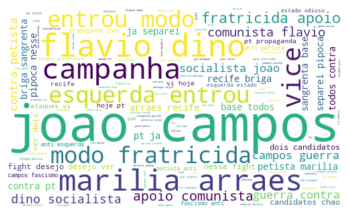

In [51]:
plt.imshow(wordCloud1, interpolation = "bilinear")
plt.axis('off')
plt.savefig('C:/Users/jeffi/OneDrive/Área de Trabalho/WordCloud_ssegundoturno/joaoPositivo.png')
plt.show()

plt.imshow(wordCloud2, interpolation = "bilinear")
plt.axis('off')
plt.savefig('C:/Users/jeffi/OneDrive/Área de Trabalho/WordCloud_ssegundoturno/joaoNegativo.png')
plt.show()

plt.imshow(wordCloud3, interpolation = "bilinear")
plt.axis('off')
plt.savefig('C:/Users/jeffi/OneDrive/Área de Trabalho/WordCloud_ssegundoturno/joaoNeutro.png')
plt.show()